### Cyper-physical Systems Programming Exam
by Benedikte Petersen, Natalia Anna Prokopiuk, Stijn Kolkman

## About the project

The objective of the project is to adaption an orignial code changing video frames in to Dynamic vison sensor (DVS) frames, so it is able to do batch processing.

The original code is made by the Swiss National Competence Center for Robotics (https://github.com/SensorsINI/v2e). 

The main objective is to create a simulator that, instead of taking as input a frame of size W, H for each timestep, have to take torch tensor (already in GPU) with size B (batch), W, H.

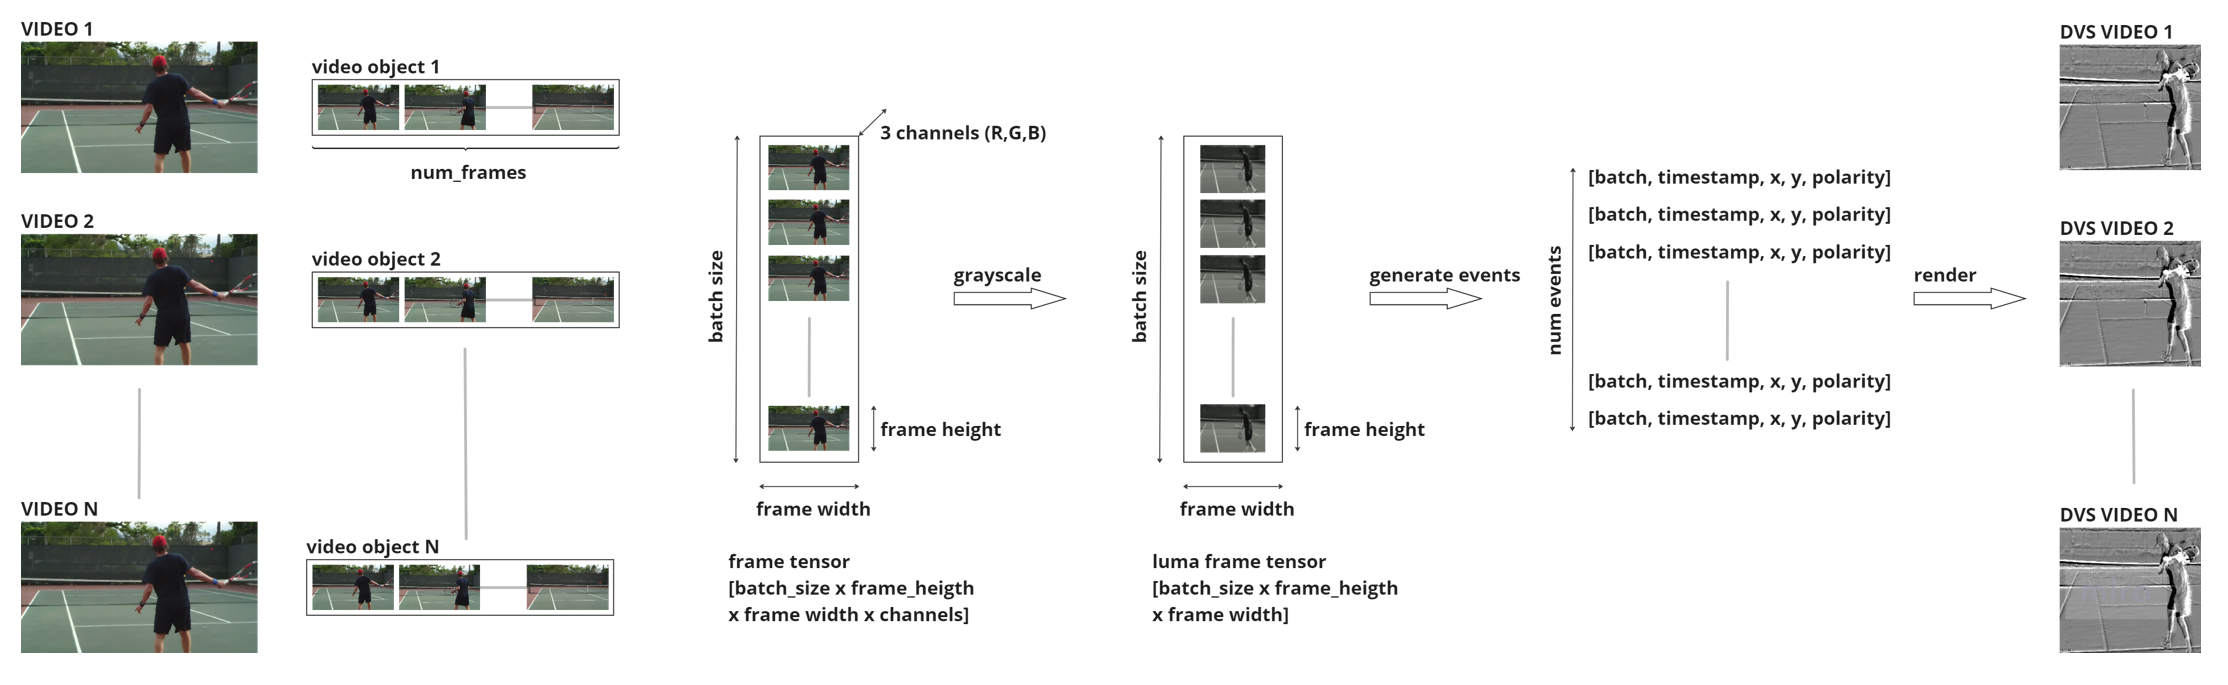

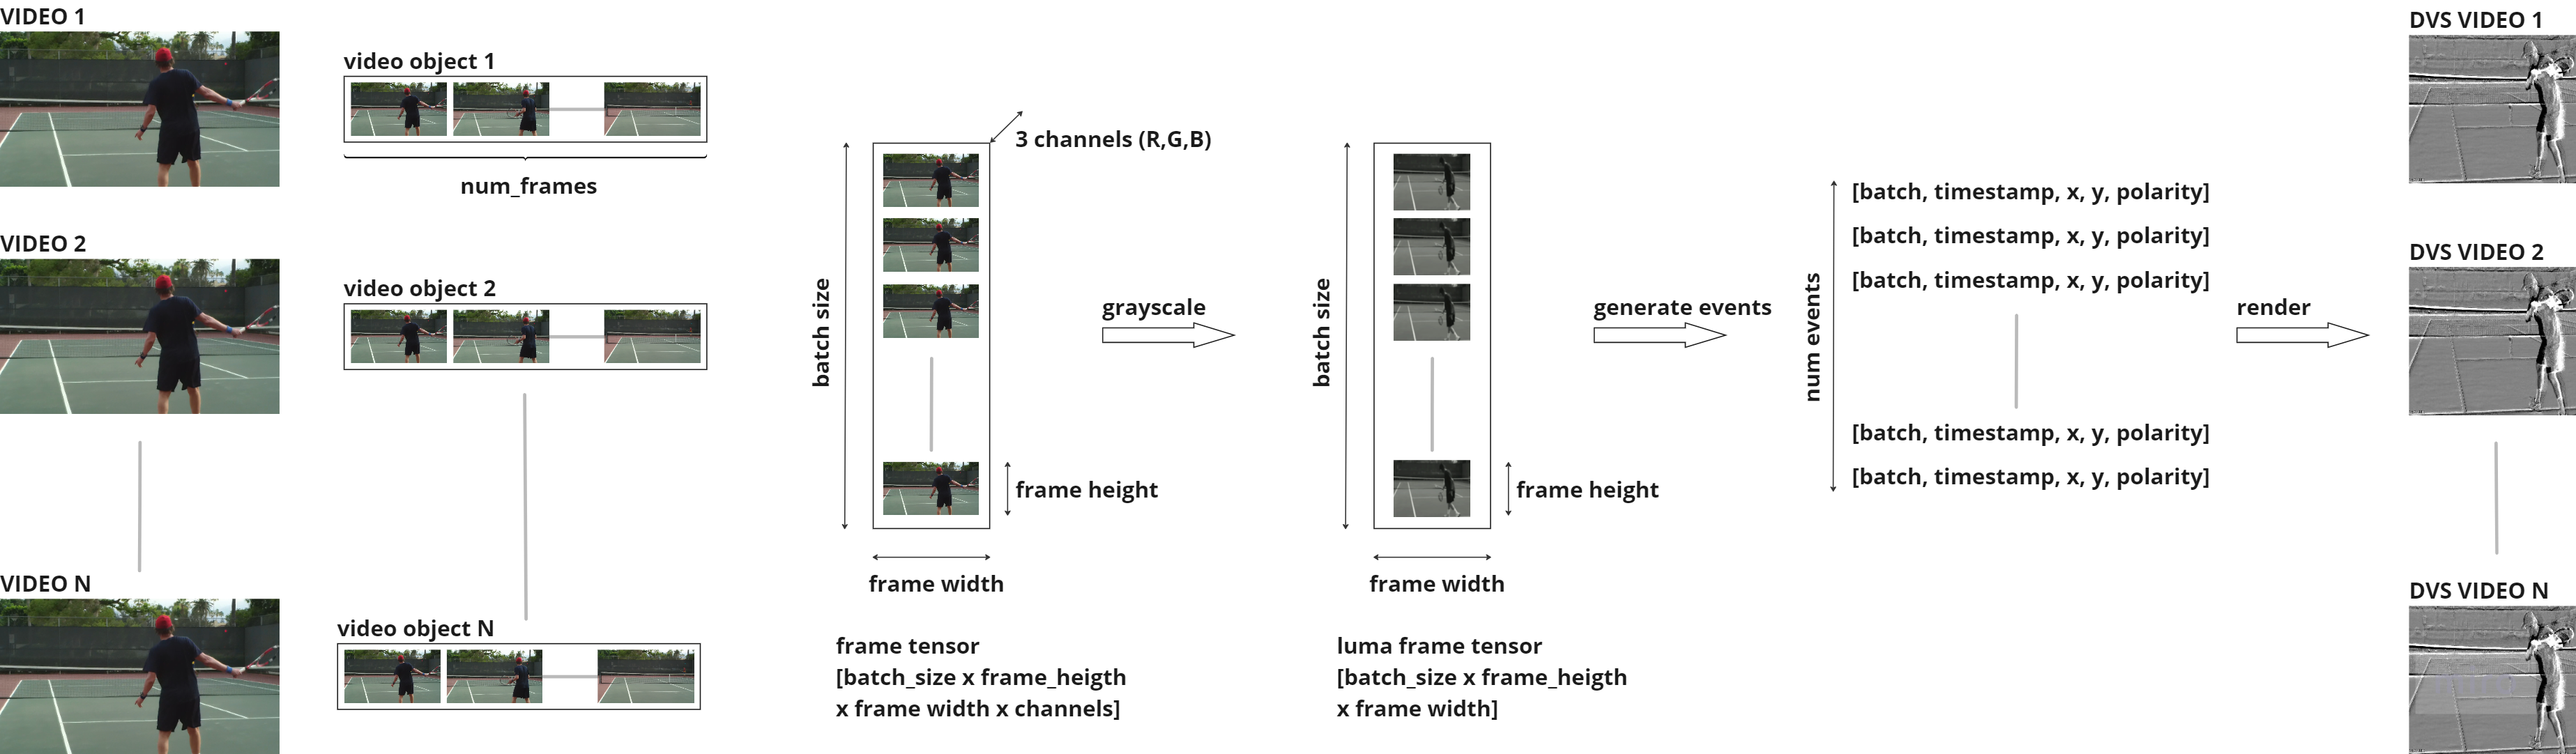

## About the process

To convert the code to support batch processing 3 files had to be rewritten Newmain.py, Newemulator.py and emulator_utiliesNew.py. 

# About NewMain.py

The file is structured
- Configuration
    Run on cpu
- Read video files
    defineing path and batch size
- Define emulator settings and initialization
    Defining values such as threshold for detecting positie and negative events and minimum time between consecutive events at a pixel, preventing oversampling. and so on.
- Video Analyzing
    loop over the video's in the input folder to get the frames and the information (fps, num_of_frames, duration, delta_t, current_time) 
- Batch Video Frame Processing and Event Generation Loop
    This loop processes video frames from multiple video streams in parallel and performs initial pre-processing, such as converting frames to tensors and preparing them for subsequent computations.

    Convert numpy array into pytorch tensor

    Make a frame tensor storing height and width for each video

    Then create luma frame tensor by multiply the frame tensor with the weight. WHY

    The luma frame is then passed to the generate event function in emulator new. The function simulates events based on the frame

    Log event statistics for the batch

-Relaease resources

# about emulatorNew

The newMain call the generate_event function in emulator. The function take the luma frame and a time stamp and return the events

- Time mangement
    make sure the time is forward going and calculate a delta time
- Check if float 32
 

## About the code and user guide


The code in this repository is an adaption of the original code by the Swiss National Competence Center for Robotics (https://github.com/SensorsINI/v2e). 
The main change in this code is:

Batch Processing:
- Added functionality to process multiple video files simultaneously, leveraging GPU parallelism for improved efficiency.
- Supports batch-wise data loading and event generation.

To run the code follow the steps below which are copied from the original V2E github. Please not that you should clone this repository and not the original one.


## Local Installation (NEEDS TO BE EDITH)
There are 3 general steps
1. Make a _conda_ environment
2. Install _pytoch_ and other _conda_ distributed packages to this environment
3. Install the rest of the packages and _v2e_ to the conda enviroment with _pip_.

_pip_ is needed because some packages are not availble from the conda repositories. It is important to go in this order because _conda_ in general is not aware of _pip_ installs.

### Make conda environment
Install _v2e_ to a separate Python environment
such as `conda` environment:

```bash
conda create -n v2e python=3.10  # create a new environment
conda activate v2e  # activate the environment
```

### Use pip to install rest of packages and v2e (NEEDS TO BE EDITH)
After installing pytorch to your CUDA environment, to install v2e in developer mode (so your edits to source take effect immediately), run the following command in your terminal inside the activated conda environment. The `python -m pip install -e .` command runs _setup.py_ which installs more packages and adds a script to run _v2e_ from the command line to the _conda_ enviroment python path; see https://stackoverflow.com/questions/39023758/what-does-pip-install-dot-mean:
```bash
conda activate v2e # activate your env with pytoch already installed by conda
git clone https://github.com/SensorsINI/v2e
cd v2e
python -m pip install -e . # use pip to install requirements from setup.py in user mode (so your edits to source files in v2e take effect immediately
```

+ If you want an additional Windows GUI interface, you will need to install [Gooey](https://github.com/chriskiehl/Gooey) package. This package works the best on Windows:
    ```bash
    pip install Gooey
    ```
    On Linux, `Gooey` can be hard to install.

    For a sample of conversion using the gooey GUI, see https://youtu.be/THJqRC_q2kY

### Download SuperSloMo model (NEEDS TO BE EDITH)

We use the excellent [Super SloMo](https://people.cs.umass.edu/~hzjiang/projects/superslomo/) framework to interpolate the APS frames.
However, since APS frames only record light intensity, we  retrained it on grayscale images.

Download our pre-trained model checkpoint from Google Drive
[SuperSloMo39.ckpt](https://drive.google.com/file/d/1ETID_4xqLpRBrRo1aOT7Yphs3QqWR_fx/view?usp=sharing) (151 MB) and save it to the _input_ folder. 
The default value of --slomo_model argument is set to this location.

Special thanks to Zhe He for recovering the checkpoint file.

### Download sample input data (NEEDS TO BE EDITH)
The sample input videos to try _v2e_ with are in [v2e-sample-input-data](https://drive.google.com/drive/folders/1oWxTB9sMPp6UylAdxg5O1ko_GaIXz7wo?usp=sharing) on google drive.

Download the [tennis.mov](https://drive.google.com/file/d/1dNUXJGlpEM51UVYH4-ZInN9pf0bHGgT_/view?usp=sharing)
video and put in the _input_ folder
to run the example below.

## Usage (NEEDS TO BE EDITH)

_v2e_ serves multiple purposes. Please read to code if you would like to adapt it for your own application. Here, we only introduce the usage for generating DVS events from conventional video and from specific datasets.

 


 


